<div dir="rtl">

# جلسه هشتم و نهم، ۱۱ و ۱۲ شهریور
در این جلسه قصد داریم تا ضمن بررسی چند نکته کوتاه جدید، به تثبیت مطالب آموخته شده بپردازیم.
</div>

## \_\_doc\_\_
<div dir="rtl">

فایل شما ممکن است شامل ده ها تابع باشد، می‌توانیم با اضافه کردن یک کامنت خاص به تعریف تابع، کار با آن را ساده تر کنیم.
</div>

In [13]:
# here is how to define a description for your function
def func(n):
    """ this function takes a number n and doubles it """
    return 2*n

# dunder (=double underscore) attribute
print(func.__doc__) # documentation

 this function takes a number n and doubles it 


In [14]:
from sympy import *

x = symbols('x')

e = 0
n = 10

for i in range(0, n):
    e = e + x**i/factorial(i)

e.subs(x, 5).evalf() # substitution, evaluate function

143.689456569665

In [15]:
import math

e = 0
n = 10
x = 5

for i in range(0, n):
    e += x**i / math.factorial(i)
print(format(e, '.3f'))

143.689


### Question
Implement a class representing a _2x2 matrix_. You should include a str method to print the matrix, a mul method to implement matrix multiplication and method to compute the determinant. It should also have an add method to add two matrices together. Also as a bonus: implement the \_\_getitem\_\_ method to get matrix elements by row and column.

In [16]:
# first lets see how matrices are included in numpy
import numpy as np

a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])

print(a)
print(b)
print(a[1][1])
print(a+b)
print(np.matmul(a, b)) # matrix multiplication
print(np.linalg.det(a))

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
4
[[ 6  8]
 [10 12]]
[[19 22]
 [43 50]]
-2.0000000000000004


In [17]:
# same thing in sympy
from sympy import *

a = Matrix([[1, 2], [3, 4]])
b = Matrix([[5, 6], [7, 8]])
c = a+b
c

Matrix([
[ 6,  8],
[10, 12]])

In [18]:
c[1, 1]


12

In [19]:
d = a*b
d

Matrix([
[19, 22],
[43, 50]])

In [20]:
a.det()

-2

In [21]:
class TwoxTwoMatrix:
    def multiplication_helper(self, first, second):
        return first[0]*second[0] + first[1]*second[1]

    def __init__(self, l):
        """
            pass a list in the form of [[1, 2], [3, 4]]
        """
        self.row_1 = l[0]
        self.row_2 = l[1]
        self.col_1 = [l[0][0], l[1][0]]
        self.col_2 = [l[0][1], l[1][1]]
    
    def __str__(self):
        return "[{},\n {}]".format(self.row_1, self.row_2)

    def __add__(self, other):
        x_00 = self.row_1[0] + other.row_1[0]
        x_01 = self.row_1[1] + other.row_1[1]
        x_10 = self.row_2[0] + other.row_2[0]
        x_11 = self.row_2[1] + other.row_2[1]

        return TwoxTwoMatrix([[x_00, x_01], [x_10, x_11]])

    def __mul__(self, other):
        x_00 = self.multiplication_helper(self.row_1, other.col_1)
        x_01 = self.multiplication_helper(self.row_1, other.col_2)
        x_10 = self.multiplication_helper(self.row_2, other.col_1)
        x_11 = self.multiplication_helper(self.row_2, other.col_2)

        return TwoxTwoMatrix([[x_00, x_01], [x_10, x_11]])

    def det(self):
        return self.row_1[0]*self.row_2[1] - self.row_1[1]*self.row_2[0]

a = TwoxTwoMatrix([[1, 2], [3, 4]])
b = TwoxTwoMatrix([[5, 6], [7, 8]])

print(a.det())


-2


In [22]:
# سوال اعداد اول در کوئرا

def prime_list(n):
    l = [i for i in range(2, n+1)]

    for i in l:
        for j in l:
            if i == j:
                continue
            elif j % i == 0:
                l.remove(j)
    return l

def find_first_index(n, l):
    for i in range(0, len(l)):
        if l[i] >= n:
            return i

a = 2
b = 2
p = prime_list(10000)

start = find_first_index(a, p)
end = find_first_index(b, p)
p_slice = p[start:end+1]
print(p_slice)

[2]


In [23]:
# using sigmas in sympy
from sympy import *

m, k = symbols('m k')
f = 5*k

Sum(f, (k, 1, m))

Sum(5*k, (k, 1, m))

In [24]:
Sum(5*k, (k, 1, m)).doit()

5*m**2/2 + 5*m/2

In [26]:
n, k, a, x = symbols('n k a x')

f = binomial(n, k)
g = x**k * a**(n-k)
h = f*g
ans = Sum(h, (k, 0, n))
ans.subs( [(x, 2), (a, 2), (n, 5)] ).doit()


1024

In [27]:
# isinstance function
print(isinstance("hello", str))
print(isinstance("hello", int))
print(isinstance(2, float))

True
False
False


In [28]:
# function annotation

def func(n: 'n should be in kg', i: 'should be in joules') -> float: # these are function annotations
    """ this is a function description"""
    return 2*n

func.__annotations__

{'n': 'n should be in kg', 'i': 'should be in joules', 'return': float}

In [29]:
import numpy as np
# divide range [0, 9] into 10 segments
x = np.linspace(0, 10, 3)

In [30]:
# we can perform operations on numpy arrays
# the operation will act on all members of the array
x = np.linspace(0, 9, 10)

print(x)
print(x**2)
print(x + 2)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[ 0.  1.  4.  9. 16. 25. 36. 49. 64. 81.]
[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]


In [31]:
# operations are performed elementwise
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
x*y

array([ 4, 10, 18])

### Question
lets write a class that implements a quadradic polynomial: $ax^2 + bx + c = 0$. Our class should have an eval() method that evaluates the polynomial for a given $x$, should have a method to return the roots and calculate $\Delta = b^2 - 4ac$. should have an \_\_add\_\_ method and a \_\_sub\_\_ method to implement addition and substraction. It should also have a method to multiply the polynomial by an `int`. Also, it should have a method to plot the polynomial.

0x^2 + 2x + 10


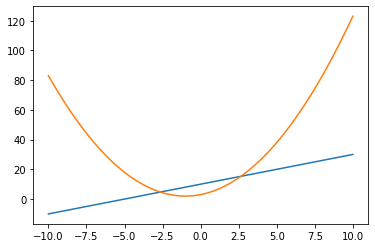

In [33]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

class Polynomial:
    def __init__(self, a, b, c) -> None:
        """
            function expects a, b, c according to ax^2 + bx + c.
        """
        self.a = a
        self.b = b
        self.c = c

        # alternatively, you could define delta as an attribute
        # self.delta = b**2 - 4*a*c

    def __str__(self) -> str:
        return "{}x^2 + {}x + {}".format(self.a, self.b, self.c)
    
    def __add__(self, other):
        if isinstance(other, int) or isinstance(other, float):
            return Polynomial(self.a, self.b, self.c + other)
        
        if isinstance(other, Polynomial):
            return Polynomial(self.a + other.a, self.b + other.b, self.c + other.c)

    def __sub__(self, other):
        if isinstance(other, int) or isinstance(other, float):
            return Polynomial(self.a, self.b, self.c - other)
        
        if isinstance(other, Polynomial):
            return Polynomial(self.a - other.a, self.b - other.b, self.c - other.c)
    
    def __mul__(self, other):
        if isinstance(other, int) or isinstance(other, float):
            return Polynomial(other*self.a, other*self.b, other*self.c)

    def __rmul__(self, lhs):
        return self * lhs  

    def delta(self):
        return self.b**2 - 4*self.a*self.c

    def roots(self):
        # first check is to see if a == 0, if true we have
        # bx + c which is at most degree 1
        if self.a == 0:
            # now if b == 0, then we have c = 0 as our polynomial
            if self.b == 0:
                # if c == 0 then our polynomial is a constant 0 and has
                # infinately many zeros
                if self.c == 0:
                    return "Infinitely many zeros"
                # else its something like 2 = 0 which has no zeros
                else:
                    return "Impossible"
            # if b != 0 then we have bx + c = 0 -> x = -c/b
            else:
                return -self.c/self.b,
        # if a != 0 we have
        # ax^2 + bx + c which is a degree 2 polynomial and should be solved
        # using the delta
        else:
            d = self.delta()
            
            if d < 0:
                # you could also raise an exception like:
                # raise ValueError("delta is smaller than 0, no real roots")
                return "No real roots"

            elif d == 0:
                return -self.b/(2*self.a), -self.b/(2*self.a)

            # now we know that delta > 0 and there are 2 real roots
            else:
                return (-self.b + sqrt(d))/(2*self.a), (-self.b - sqrt(d))/(2*self.a)

    def eval(self, x):
        return self.a * x**2 + self.b * x + self.c

    def plot(self, start=0, end=10, res=10):
        x = np.linspace(start, end, res)
        y = self.a * x**2 + self.b * x + self.c
        plt.plot(x, y)

p = Polynomial(0, 2, 10)
q = Polynomial(1, 2, 3)
print(p)
p.plot(start=-10, end=10, res=1000)
q.plot(start=-10, end=10, res=1000)


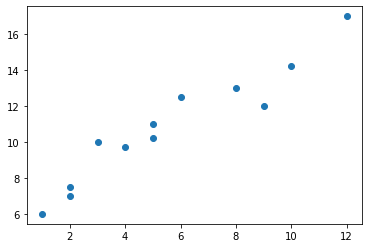

In [34]:
x = np.array([1, 2, 2, 3, 4, 5, 5, 6, 8, 9, 10, 12])
y = np.array([6, 7, 7.5, 10, 9.75, 10.25, 11, 12.5, 13, 12, 14.25, 17])

plt.plot(x, y, 'o')